<a href="https://colab.research.google.com/github/trishamallick/image_encryption/blob/main/peppers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

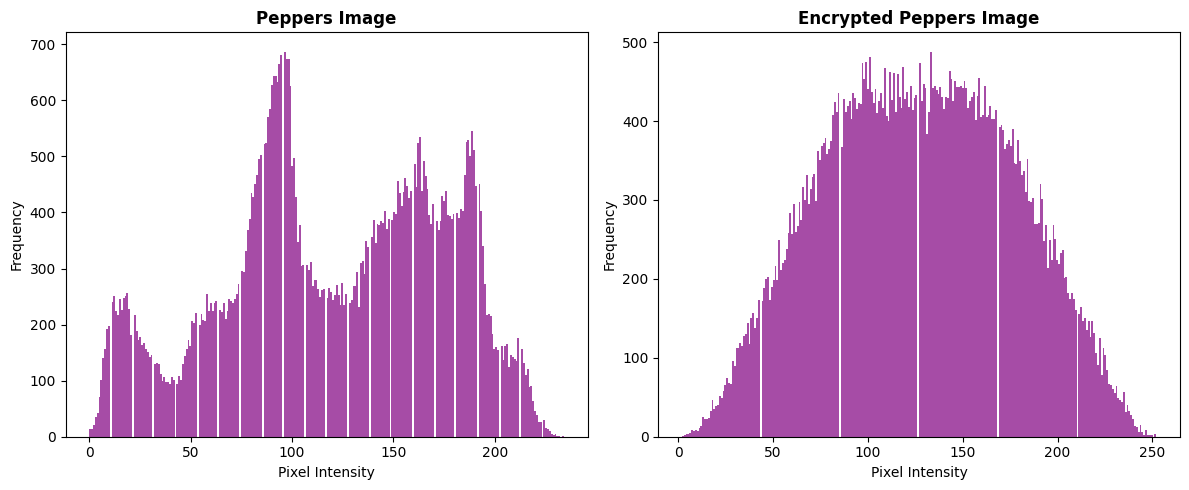

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute and plot the histogram of an image
def plot_histogram(image, title, subplot_index):
    plt.subplot(1, 2, subplot_index)
    plt.hist(image.ravel(), bins=256, color='purple', alpha=0.7)
    # plt.title(title)
    plt.title(title, fontsize=12, fontweight='bold')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

# Load two images
image1 = cv2.imread("peppers.jpeg", cv2.IMREAD_GRAYSCALE)  # Original image
image2 = cv2.imread("final_encrypted.png", cv2.IMREAD_GRAYSCALE)  # Encrypted image

# Check if images are loaded correctly
if image1 is None or image2 is None:
    raise ValueError("Error loading images. Check file paths.")

# Create a figure for the histograms
plt.figure(figsize=(12, 5))

# Plot histograms
plot_histogram(image1, "Peppers Image", 1)
plot_histogram(image2, "Encrypted Peppers Image", 2)

# Show the histograms
plt.tight_layout()
plt.show()

Horizontal Correlation: Original = 0.9451, Encrypted = -0.0020
Vertical Correlation: Original = 0.9531, Encrypted = 0.0006
Diagonal Correlation: Original = 0.9131, Encrypted = 0.0014


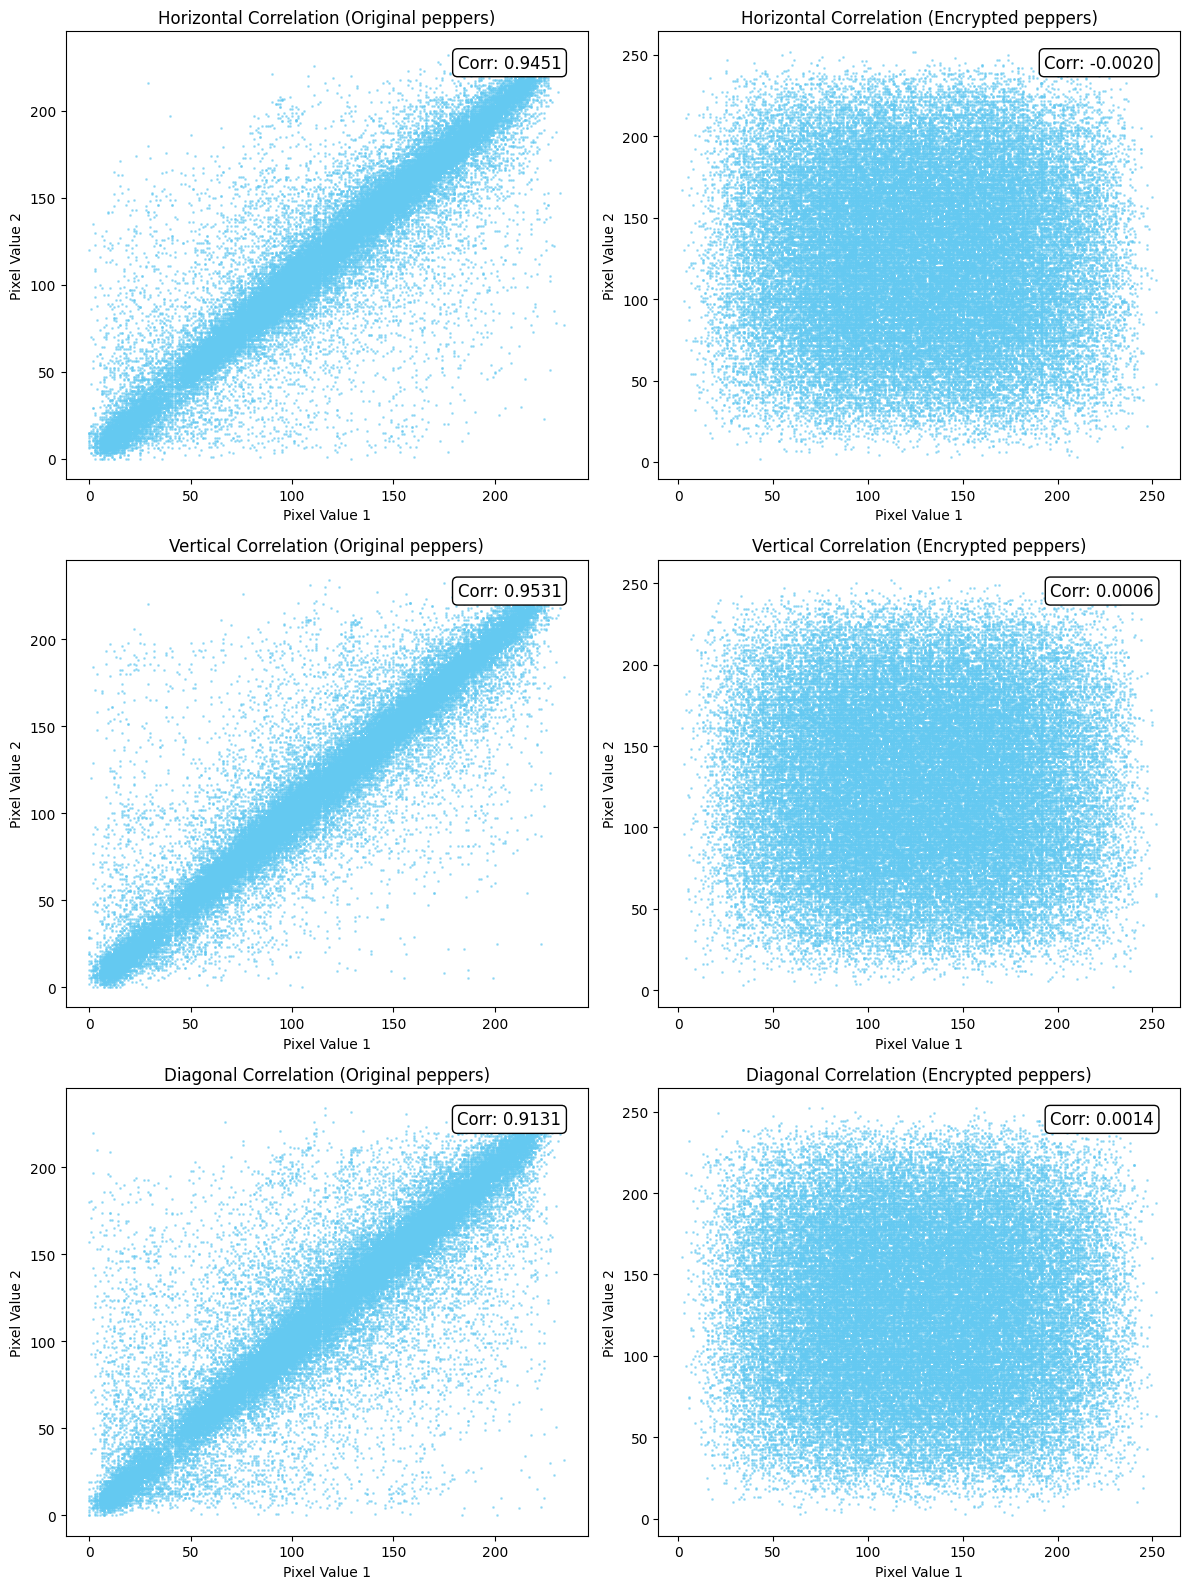

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load images from encryption function output
original_image = cv2.imread("peppers.jpeg", cv2.IMREAD_GRAYSCALE)
encrypted_image = cv2.imread("final_encrypted.png", cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if original_image is None:
    raise ValueError("Error: Could not load 'peppers.jpeg'. Check the file path.")
if encrypted_image is None:
    raise ValueError("Error: Could not load 'encrypted_peppers.jpeg'. Check the file path.")

# Ensure encrypted image matches original image dimensions
encrypted_image = cv2.resize(encrypted_image, (original_image.shape[1], original_image.shape[0]))

# Function to compute correlation coefficient in different directions
def calculate_correlation(image, direction):
    x, y = [], []
    h, w = image.shape

    if direction == "horizontal":
        for i in range(h):
            for j in range(w - 1):
                x.append(image[i, j])
                y.append(image[i, j + 1])

    elif direction == "vertical":
        for i in range(h - 1):
            for j in range(w):
                x.append(image[i, j])
                y.append(image[i + 1, j])

    elif direction == "diagonal":
        for i in range(h - 1):
            for j in range(w - 1):
                x.append(image[i, j])
                y.append(image[i + 1, j + 1])

    return pearsonr(x, y)[0]  # Pearson correlation coefficient

# Compute correlation coefficients for original and encrypted images
directions = ["horizontal", "vertical", "diagonal"]
correlation_values = {}

for direction in directions:
    corr_original = calculate_correlation(original_image, direction)
    corr_encrypted = calculate_correlation(encrypted_image, direction)
    correlation_values[direction] = (corr_original, corr_encrypted)

# Display correlation results
for direction in directions:
    print(f"{direction.capitalize()} Correlation: "
          f"Original = {correlation_values[direction][0]:.4f}, "
          f"Encrypted = {correlation_values[direction][1]:.4f}")

# Plot scatter diagrams
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

for i, direction in enumerate(directions):
    x_orig, y_orig = [], []
    x_enc, y_enc = [], []

    h, w = original_image.shape

    if direction == "horizontal":
        for r in range(h):
            for c in range(w - 1):
                x_orig.append(original_image[r, c])
                y_orig.append(original_image[r, c + 1])
                x_enc.append(encrypted_image[r, c])
                y_enc.append(encrypted_image[r, c + 1])

    elif direction == "vertical":
        for r in range(h - 1):
            for c in range(w):
                x_orig.append(original_image[r, c])
                y_orig.append(original_image[r + 1, c])
                x_enc.append(encrypted_image[r, c])
                y_enc.append(encrypted_image[r + 1, c])

    elif direction == "diagonal":
        for r in range(h - 1):
            for c in range(w - 1):
                x_orig.append(original_image[r, c])
                y_orig.append(original_image[r + 1, c + 1])
                x_enc.append(encrypted_image[r, c])
                y_enc.append(encrypted_image[r + 1, c + 1])

    # Scatter plots for original image
    axes[i, 0].scatter(x_orig, y_orig, s=1, color='#64c9f1', alpha=0.5)
    axes[i, 0].set_title(f"{direction.capitalize()} Correlation (Original peppers)")
    axes[i, 0].set_xlabel("Pixel Value 1")
    axes[i, 0].set_ylabel("Pixel Value 2")

    # Scatter plots for encrypted image
    axes[i, 1].scatter(x_enc, y_enc, s=1, color='#64c9f1', alpha=0.5)
    axes[i, 1].set_title(f"{direction.capitalize()} Correlation (Encrypted peppers)")
    axes[i, 1].set_xlabel("Pixel Value 1")
    axes[i, 1].set_ylabel("Pixel Value 2")

    # Add correlation values inside the plot
    for j in range(2):  # 0 for original, 1 for encrypted
        axes[i, j].text(
            0.95, 0.95,
            f"Corr: {correlation_values[direction][j]:.4f}",
            transform=axes[i, j].transAxes,
            fontsize=12,
            color='black',
            ha='right',
            va='top',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

plt.tight_layout()
plt.show()


### **Decription**

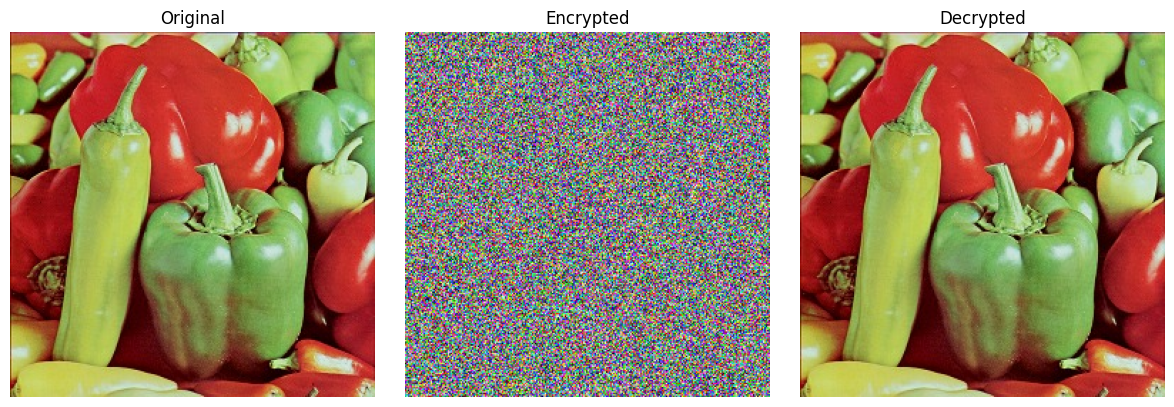

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# -------------------- Padding Helpers --------------------
def pad_to_even(img):
    r, c = img.shape[:2]
    pad_r = r % 2
    pad_c = c % 2
    if pad_r or pad_c:
        if img.ndim == 2:
            img = np.pad(img, ((0, pad_r), (0, pad_c)), mode='edge')
        else:  # RGB
            img = np.pad(img, ((0, pad_r), (0, pad_c), (0, 0)), mode='edge')
    return img, (pad_r, pad_c)

def unpad_even(img, pad):
    pad_r, pad_c = pad
    if pad_r:
        img = img[:-pad_r, ...]
    if pad_c:
        img = img[:, :-pad_c, ...]
    return img

# -------------------- CA Keystream (reversible via XOR) --------------------
def ca_keystream(shape, rule_number, seed):
    rng = np.random.default_rng(seed ^ rule_number)
    return rng.integers(0, 256, size=np.prod(shape), dtype=np.uint8).reshape(shape)

# -------------------- Baker’s Map (per-channel) --------------------
def bakers_map(img):
    H, W = img.shape[:2]
    assert H % 2 == 0 and W % 2 == 0, "Baker requires even dims"
    if img.ndim == 2:  # grayscale
        out = np.empty_like(img)
    else:  # RGB
        out = np.empty_like(img)
    h2, w2 = H // 2, W // 2
    if img.ndim == 2:
        out[:h2, :w2]   = img[::2, ::2]
        out[:h2,  w2:]  = img[::2, 1::2]
        out[h2:, :w2]   = img[1::2, ::2]
        out[h2:,  w2:]  = img[1::2, 1::2]
    else:  # RGB channel-wise
        for ch in range(3):
            out[:h2, :w2, ch]   = img[::2, ::2, ch]
            out[:h2,  w2:, ch]  = img[::2, 1::2, ch]
            out[h2:, :w2, ch]   = img[1::2, ::2, ch]
            out[h2:,  w2:, ch]  = img[1::2, 1::2, ch]
    return out

def inverse_bakers_map(img):
    H, W = img.shape[:2]
    h2, w2 = H // 2, W // 2
    if img.ndim == 2:
        out = np.empty_like(img)
        out[::2, ::2]   = img[:h2, :w2]
        out[::2, 1::2]  = img[:h2,  w2:]
        out[1::2, ::2]  = img[h2:, :w2]
        out[1::2, 1::2] = img[h2:,  w2:]
    else:
        out = np.empty_like(img)
        for ch in range(3):
            out[::2, ::2, ch]   = img[:h2, :w2, ch]
            out[::2, 1::2, ch]  = img[:h2,  w2:, ch]
            out[1::2, ::2, ch]  = img[h2:, :w2, ch]
            out[1::2, 1::2, ch] = img[h2:,  w2:, ch]
    return out

# -------------------- Logistic Keystream --------------------
def logistic_keystream(size, r=3.99, x0=0.723):
    ks = np.empty(size, dtype=np.uint8)
    x = x0
    for i in range(size):
        x = r * x * (1 - x)
        ks[i] = int(x * 256) % 256
    return ks

# -------------------- ENCRYPT --------------------
def encrypt_image(image_path,
                  ca60_rule=60, ca60_seed=123,
                  ca30_rule=30, ca30_seed=321,
                  r=3.99, x0=0.723):
    original = Image.open(image_path).convert("RGB")  # allow both grayscale & RGB
    img = np.array(original, dtype=np.uint8)

    # If grayscale, keep shape 2D
    if len(img.shape) == 3 and img.shape[2] == 1:
        img = img[:, :, 0]

    # pad for baker
    img_even, pad = pad_to_even(img)

    # Stage 1: CA60 + Baker
    ks60 = ca_keystream(img_even.shape, ca60_rule, ca60_seed)
    ca60_out = img_even ^ ks60
    first_encrypted = bakers_map(ca60_out)

    # Stage 2: CA30 + Logistic
    ks30 = ca_keystream(first_encrypted.shape, ca30_rule, ca30_seed)
    ca30_out = first_encrypted ^ ks30

    flat = ca30_out.flatten()
    logi = logistic_keystream(flat.size, r=r, x0=x0)
    final_encrypted = (flat ^ logi).reshape(ca30_out.shape)

    Image.fromarray(final_encrypted).save("final_encrypted.png")

    key = {
        "shape_even": tuple(img_even.shape),
        "pad": pad,
        "ca60_rule": ca60_rule, "ca60_seed": ca60_seed,
        "ca30_rule": ca30_rule, "ca30_seed": ca30_seed,
        "r": r, "x0": x0,
        "mode": "RGB" if final_encrypted.ndim == 3 else "L"
    }
    return final_encrypted, key, img

# -------------------- DECRYPT --------------------
def decrypt_image(cipher, key):
    H, W = key["shape_even"][:2]

    # Stage 2 reverse
    flat = cipher.flatten()
    logi = logistic_keystream(flat.size, r=key["r"], x0=key["x0"])
    ca30_out = (flat ^ logi).reshape(cipher.shape)
    ks30 = ca_keystream(cipher.shape, key["ca30_rule"], key["ca30_seed"])
    first_encrypted = ca30_out ^ ks30

    # Stage 1 reverse
    ca60_scrambled = inverse_bakers_map(first_encrypted)
    ks60 = ca_keystream(ca60_scrambled.shape, key["ca60_rule"], key["ca60_seed"])
    recovered_even = ca60_scrambled ^ ks60

    # Remove padding
    recovered = unpad_even(recovered_even, key["pad"])
    return recovered

# -------------------- Demo --------------------
enc, key, orig = encrypt_image("peppers.jpeg")
dec = decrypt_image(enc, key)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(orig if orig.ndim==3 else orig, cmap=None if orig.ndim==3 else "gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(enc if enc.ndim==3 else enc, cmap=None if enc.ndim==3 else "gray"); plt.title("Encrypted"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(dec if dec.ndim==3 else dec, cmap=None if dec.ndim==3 else "gray"); plt.title("Decrypted"); plt.axis("off")
plt.tight_layout(); plt.show()

Image.fromarray(dec).save("decrypted.png")


MSE: 10080.3587
PSNR: 8.096 dB
UACI: 32.1783 %
NPCR: 100.0 %
MAE: 82.0546
Entropy (Original): 7.398038
Entropy (Encrypted): 8.022754


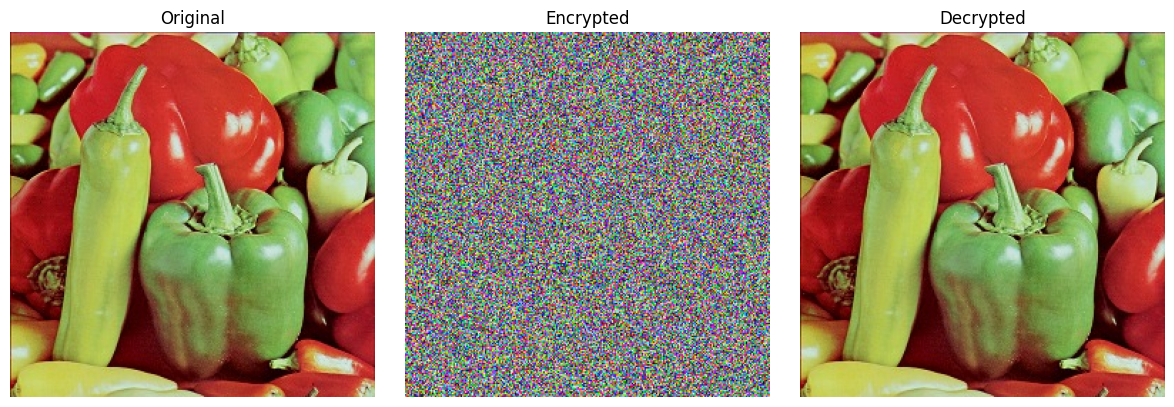

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ------------------ Helpers: padding ------------------
def pad_to_even(img):
    H, W = img.shape[:2]
    pr, pc = H % 2, W % 2
    if pr or pc:
        if img.ndim == 2:
            img = np.pad(img, ((0, pr), (0, pc)), mode='edge')
        else:
            img = np.pad(img, ((0, pr), (0, pc), (0, 0)), mode='edge')
    return img, (pr, pc)

def unpad_even(img, pad):
    pr, pc = pad
    if pr: img = img[:-pr, ...]
    if pc: img = img[:, :-pc, ...]
    return img

# ------------------ ECA keystream bytes (Rule N) ------------------
# Evolve 1D elementary CA on ring length M and collect 8 generations -> bytes.
def eca_keystream_bytes(shape, rule_number, seed=0):
    M = int(np.prod(shape))
    if M == 0:
        return np.zeros(shape, dtype=np.uint8)
    rng = np.random.default_rng(seed)
    state = rng.integers(0, 2, size=M, dtype=np.uint8)
    rule = np.array([int(x) for x in np.binary_repr(rule_number, width=8)][::-1], dtype=np.uint8)
    out = np.zeros(M, dtype=np.uint8)
    for bit in range(8):
        left = np.roll(state, 1); right = np.roll(state, -1)
        idx = (left << 2) | (state << 1) | right
        state = rule[idx]
        out |= (state << bit)
    return out.reshape(shape)

# ------------------ Baker's map + inverse ------------------
def bakers_map(img):
    H, W = img.shape[:2]
    assert H % 2 == 0 and W % 2 == 0, "Baker requires even dims"
    h2, w2 = H // 2, W // 2
    out = np.empty_like(img)
    if img.ndim == 2:
        out[:h2, :w2]   = img[::2, ::2]
        out[:h2,  w2:]  = img[::2, 1::2]
        out[h2:, :w2]   = img[1::2, ::2]
        out[h2:,  w2:]  = img[1::2, 1::2]
    else:
        for ch in range(img.shape[2]):
            out[:h2, :w2, ch]   = img[::2, ::2, ch]
            out[:h2,  w2:, ch]  = img[::2, 1::2, ch]
            out[h2:, :w2, ch]   = img[1::2, ::2, ch]
            out[h2:,  w2:, ch]  = img[1::2, 1::2, ch]
    return out

def inverse_bakers_map(img):
    H, W = img.shape[:2]
    assert H % 2 == 0 and W % 2 == 0, "Inverse Baker requires even dims"
    h2, w2 = H // 2, W // 2
    out = np.empty_like(img)
    if img.ndim == 2:
        out[::2, ::2]   = img[:h2, :w2]
        out[::2, 1::2]  = img[:h2,  w2:]
        out[1::2, ::2]  = img[h2:, :w2]
        out[1::2, 1::2] = img[h2:,  w2:]
    else:
        for ch in range(img.shape[2]):
            out[::2, ::2, ch]   = img[:h2, :w2, ch]
            out[::2, 1::2, ch]  = img[:h2,  w2:, ch]
            out[1::2, ::2, ch]  = img[h2:, :w2, ch]
            out[1::2, 1::2, ch] = img[h2:,  w2:, ch]
    return out

# ------------------ Logistic keystream bytes (improved mapping) ------------------
def logistic_keystream_bytes(shape, r=3.99, x0=0.723, burn_in=2000):
    H, W = shape[0], shape[1]
    C = 1 if len(shape) == 2 else shape[2]
    ks = np.empty((H, W, C), dtype=np.uint8)

    x = float(x0)
    # burn-in
    for _ in range(burn_in):
        x = r * x * (1.0 - x)

    for ch in range(C):
        # slight channel offset for better diffusion, but deterministic
        x_ch = (x + (ch + 1) * 0.131231) % 1.0
        for i in range(H):
            x_row = (x_ch + (i + 1) * 0.0037) % 1.0
            for j in range(W):
                x_row = r * x_row * (1.0 - x_row)
                # unbiased mapping: use high-magnitude fractional digits to reduce bias
                ks[i, j, ch] = int((x_row * 1e14) % 256)
    if len(shape) == 2:
        return ks[:, :, 0]
    return ks

# ------------------ Encryption (flowchart: CA60 -> Baker -> CA30 -> Logistic) ------------------
def encrypt_flowchart(image_path,
                      ca60_rule=60, ca60_seed=123,
                      ca30_rule=30, ca30_seed=321,
                      r=3.99, x0=0.723):
    im = Image.open(image_path)
    # keep original mode; convert others to RGB
    if im.mode not in ("L", "RGB"):
        im = im.convert("RGB")
    mode = im.mode
    img = np.array(im, dtype=np.uint8)

    # pad to even dims for Baker map
    img_even, pad = pad_to_even(img)

    # Stage 1: CA Rule 60 (keystream) XOR
    ks60 = eca_keystream_bytes(img_even.shape, rule_number=ca60_rule, seed=ca60_seed)
    after_ca60 = img_even ^ ks60

    # Baker's map (once)
    first_encrypted = bakers_map(after_ca60)

    # Stage 2: CA Rule 30 (keystream) XOR
    ks30 = eca_keystream_bytes(first_encrypted.shape, rule_number=ca30_rule, seed=ca30_seed)
    after_ca30 = first_encrypted ^ ks30

    # Logistic map XOR (once)
    logi = logistic_keystream_bytes(after_ca30.shape, r=r, x0=x0)
    final_encrypted = after_ca30 ^ logi

    key = {
        "mode": mode,
        "pad": pad,
        "shape_even": tuple(img_even.shape),
        "ca60_rule": ca60_rule, "ca60_seed": ca60_seed,
        "ca30_rule": ca30_rule, "ca30_seed": ca30_seed,
        "r": r, "x0": x0
    }

    return final_encrypted, key, np.array(im, dtype=np.uint8)

# ------------------ Decryption (reverse order) ------------------
def decrypt_flowchart(cipher, key):
    # Reverse Stage 2: logistic XOR then CA30
    logi = logistic_keystream_bytes(cipher.shape, r=key["r"], x0=key["x0"])
    after_logi = cipher ^ logi
    ks30 = eca_keystream_bytes(after_logi.shape, rule_number=key["ca30_rule"], seed=key["ca30_seed"])
    first_encrypted = after_logi ^ ks30

    # Reverse Stage 1: inverse baker then CA60
    after_inv_baker = inverse_bakers_map(first_encrypted)
    ks60 = eca_keystream_bytes(after_inv_baker.shape, rule_number=key["ca60_rule"], seed=key["ca60_seed"])
    recovered_even = after_inv_baker ^ ks60

    # remove padding
    recovered = unpad_even(recovered_even, key["pad"])
    return recovered

# ------------------ Metrics ------------------
def mse(a, b):
    return np.mean((a.astype(np.float64) - b.astype(np.float64))**2)

def psnr(a, b):
    m = mse(a, b)
    if m == 0: return float('inf')
    return 20.0 * np.log10(255.0) - 10.0 * np.log10(m)

def mae(a, b):
    return np.mean(np.abs(a.astype(np.int32) - b.astype(np.int32)))

def entropy(img):
    if img.ndim == 2:
        h, _ = np.histogram(img, bins=256, range=(0,255), density=True)
        p = h[h>0]
        return -np.sum(p * np.log2(p))
    else:
        return np.mean([entropy(img[..., c]) for c in range(img.shape[2])])

def uaci(a, b):
    a = a.astype(np.int32); b = b.astype(np.int32)
    diff = np.abs(a - b)
    return 100.0 * np.mean(diff) / 255.0

def npcr(a, b):
    if a.ndim == 3:
        changed = np.any(a != b, axis=2)
    else:
        changed = (a != b)
    return 100.0 * np.sum(changed) / changed.size

# ------------------ Demo usage ------------------
if __name__ == "__main__":
    # set input path
    infile = "peppers.jpeg"   # change to your image
    enc, key, orig = encrypt_flowchart(infile,
                                       ca60_rule=60, ca60_seed=123,
                                       ca30_rule=30, ca30_seed=321,
                                       r=3.99, x0=0.723)
    Image.fromarray(enc).save("final_encrypted.png")

    dec = decrypt_flowchart(enc, key)
    Image.fromarray(dec).save("decrypted.png")

    # metrics comparing original vs encrypted (as in your earlier set)
    print("MSE:", round(mse(orig, enc), 4))
    print("PSNR:", round(psnr(orig, enc), 4), "dB")
    print("UACI:", round(uaci(orig, enc), 4), "%")
    print("NPCR:", round(npcr(orig, enc), 4), "%")
    print("MAE:", round(mae(orig, enc), 4))
    print("Entropy (Original):", round(entropy(orig), 6))
    print("Entropy (Encrypted):", round(entropy(enc), 6))

    # quick visual check
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1); plt.imshow(orig if orig.ndim==3 else orig, cmap=None if orig.ndim==3 else "gray"); plt.title("Original"); plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(enc  if enc.ndim==3  else enc,  cmap=None if enc.ndim==3  else "gray"); plt.title("Encrypted"); plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(dec  if dec.ndim==3  else dec,  cmap=None if dec.ndim==3  else "gray"); plt.title("Decrypted"); plt.axis("off")
    plt.tight_layout(); plt.show()


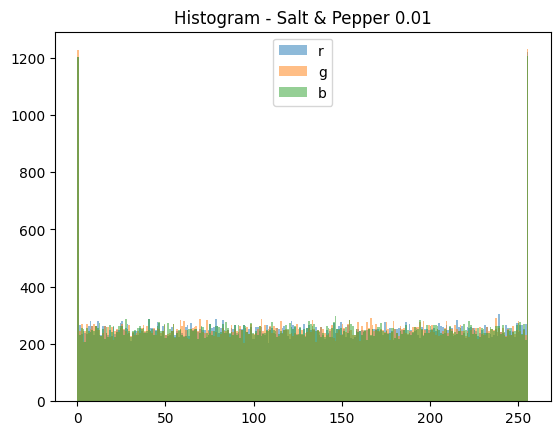

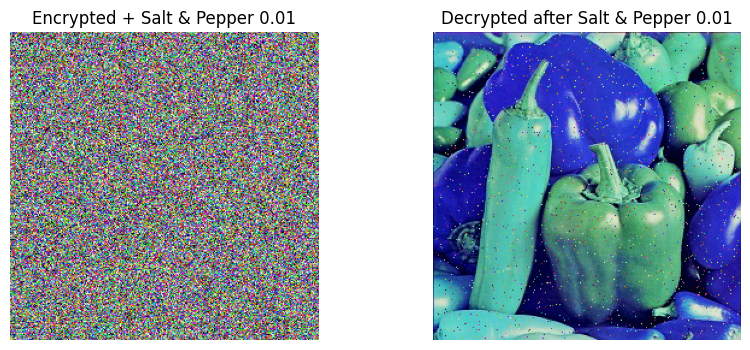

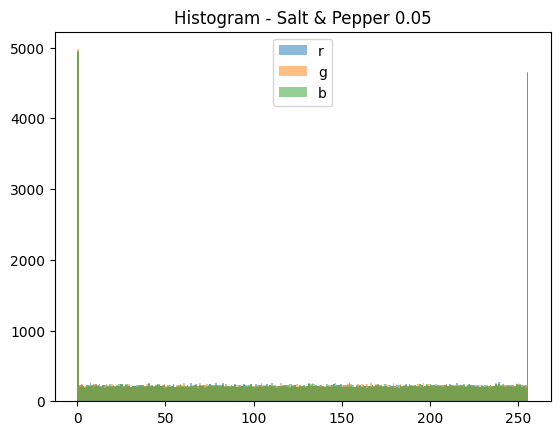

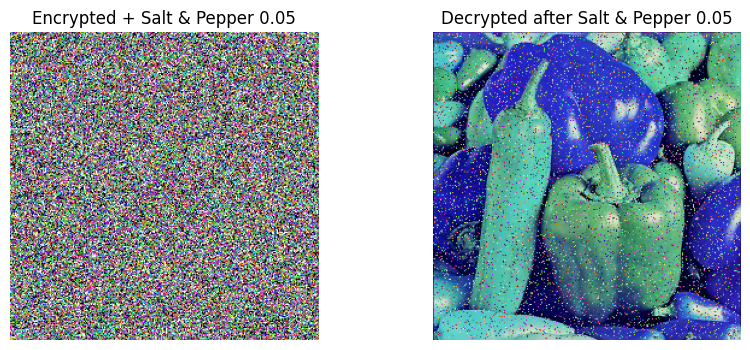

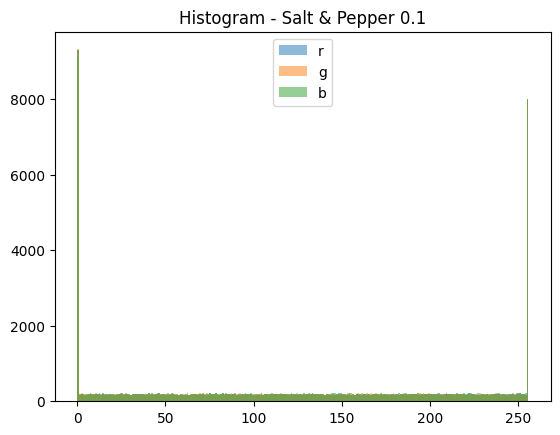

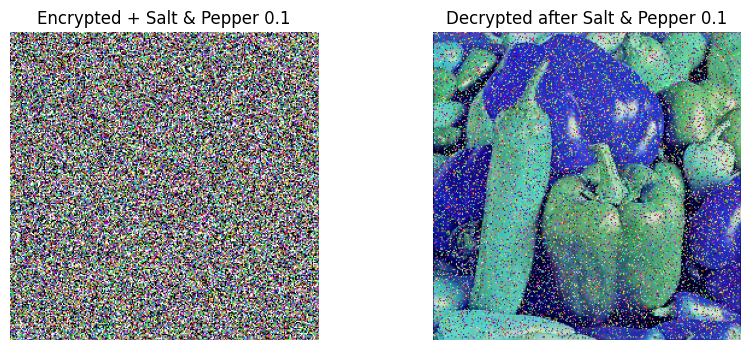

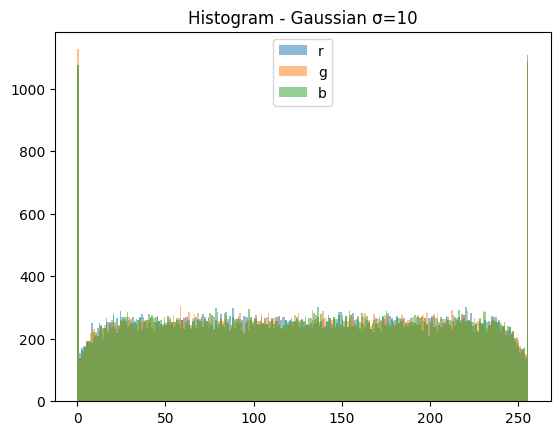

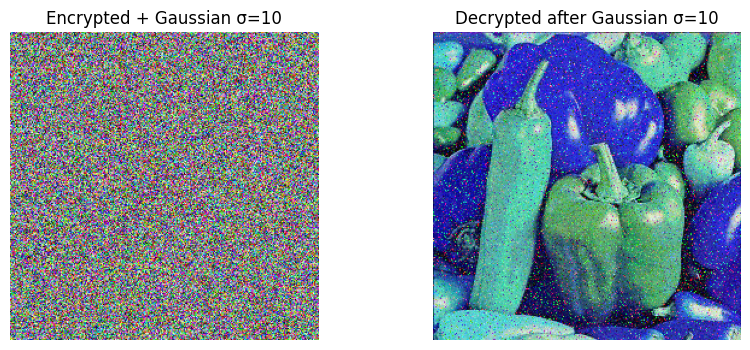

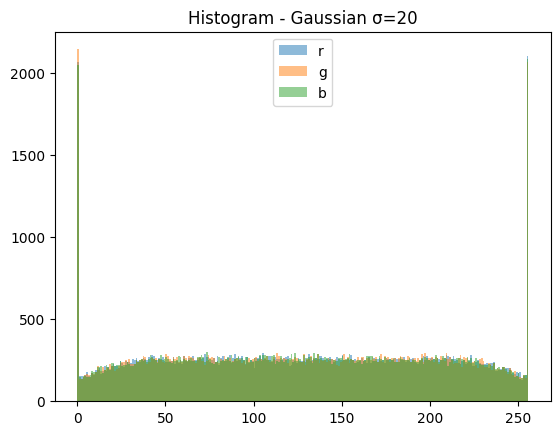

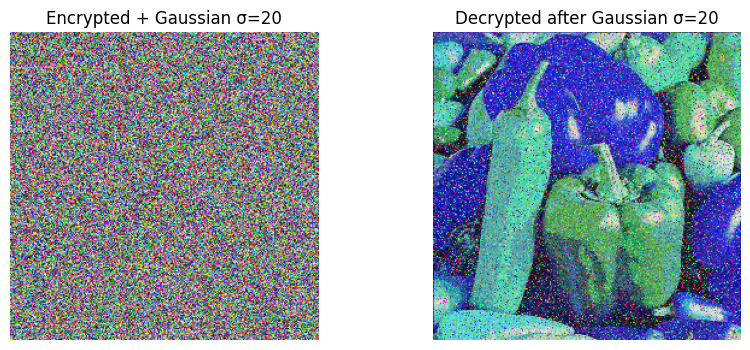

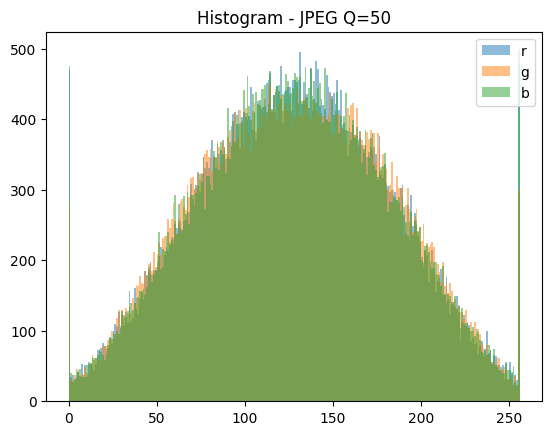

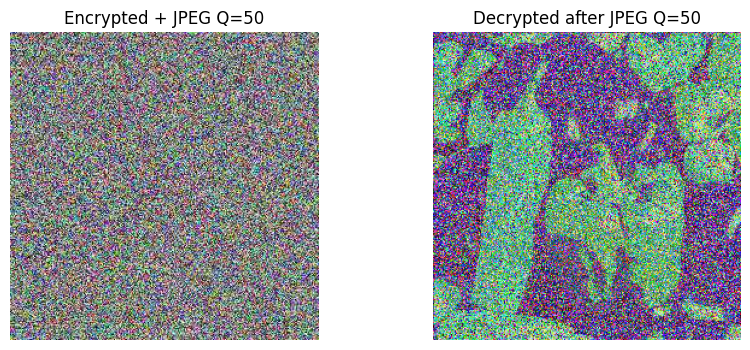

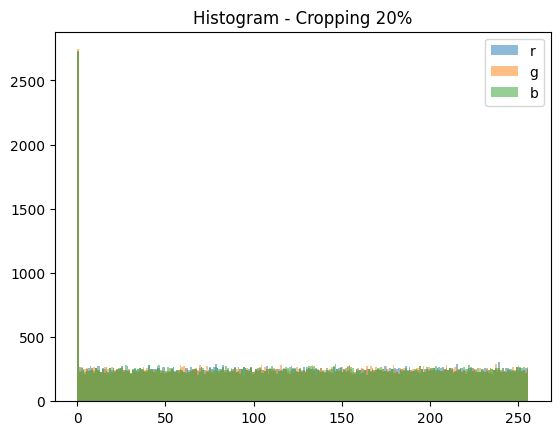

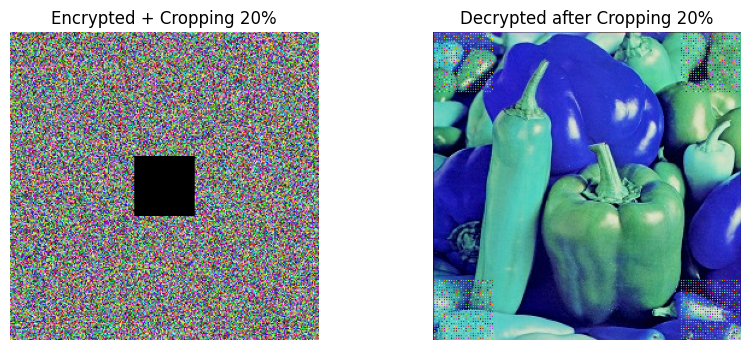

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# -------------------- Padding Helpers --------------------
def pad_to_even(img):
    r, c = img.shape[:2]
    pad_r = r % 2
    pad_c = c % 2
    if pad_r or pad_c:
        if img.ndim == 2:
            img = np.pad(img, ((0, pad_r), (0, pad_c)), mode='edge')
        else:  # RGB
            img = np.pad(img, ((0, pad_r), (0, pad_c), (0, 0)), mode='edge')
    return img, (pad_r, pad_c)

def unpad_even(img, pad):
    pad_r, pad_c = pad
    if pad_r:
        img = img[:-pad_r, ...]
    if pad_c:
        img = img[:, :-pad_c, ...]
    return img

# -------------------- CA Keystream (reversible via XOR) --------------------
def ca_keystream(shape, rule_number, seed):
    rng = np.random.default_rng(seed ^ rule_number)
    return rng.integers(0, 256, size=np.prod(shape), dtype=np.uint8).reshape(shape)

# -------------------- Baker’s Map --------------------
def bakers_map(img):
    H, W = img.shape[:2]
    assert H % 2 == 0 and W % 2 == 0, "Baker requires even dims"
    out = np.empty_like(img)
    h2, w2 = H // 2, W // 2
    if img.ndim == 2:
        out[:h2, :w2]   = img[::2, ::2]
        out[:h2,  w2:]  = img[::2, 1::2]
        out[h2:, :w2]   = img[1::2, ::2]
        out[h2:,  w2:]  = img[1::2, 1::2]
    else:
        for ch in range(3):
            out[:h2, :w2, ch]   = img[::2, ::2, ch]
            out[:h2,  w2:, ch]  = img[::2, 1::2, ch]
            out[h2:, :w2, ch]   = img[1::2, ::2, ch]
            out[h2:,  w2:, ch]  = img[1::2, 1::2, ch]
    return out

def inverse_bakers_map(img):
    H, W = img.shape[:2]
    h2, w2 = H // 2, W // 2
    out = np.empty_like(img)
    if img.ndim == 2:
        out[::2, ::2]   = img[:h2, :w2]
        out[::2, 1::2]  = img[:h2,  w2:]
        out[1::2, ::2]  = img[h2:, :w2]
        out[1::2, 1::2] = img[h2:,  w2:]
    else:
        for ch in range(3):
            out[::2, ::2, ch]   = img[:h2, :w2, ch]
            out[::2, 1::2, ch]  = img[:h2,  w2:, ch]
            out[1::2, ::2, ch]  = img[h2:, :w2, ch]
            out[1::2, 1::2, ch] = img[h2:,  w2:, ch]
    return out

# -------------------- Logistic Keystream --------------------
def logistic_keystream(size, r=3.99, x0=0.723):
    ks = np.empty(size, dtype=np.uint8)
    x = x0
    for i in range(size):
        x = r * x * (1 - x)
        ks[i] = int(x * 256) % 256
    return ks

# -------------------- ENCRYPT --------------------
def encrypt_image(image_path,
                  ca60_rule=60, ca60_seed=123,
                  ca30_rule=30, ca30_seed=321,
                  r=3.99, x0=0.723):
    original = Image.open(image_path).convert("RGB")
    img = np.array(original, dtype=np.uint8)

    img_even, pad = pad_to_even(img)

    ks60 = ca_keystream(img_even.shape, ca60_rule, ca60_seed)
    ca60_out = img_even ^ ks60
    first_encrypted = bakers_map(ca60_out)

    ks30 = ca_keystream(first_encrypted.shape, ca30_rule, ca30_seed)
    ca30_out = first_encrypted ^ ks30

    flat = ca30_out.flatten()
    logi = logistic_keystream(flat.size, r=r, x0=x0)
    final_encrypted = (flat ^ logi).reshape(ca30_out.shape)

    key = {
        "shape_even": tuple(img_even.shape),
        "pad": pad,
        "ca60_rule": ca60_rule, "ca60_seed": ca60_seed,
        "ca30_rule": ca30_rule, "ca30_seed": ca30_seed,
        "r": r, "x0": x0,
    }
    return final_encrypted, key, img

# -------------------- DECRYPT --------------------
def decrypt_image(cipher, key):
    flat = cipher.flatten()
    logi = logistic_keystream(flat.size, r=key["r"], x0=key["x0"])
    ca30_out = (flat ^ logi).reshape(cipher.shape)
    ks30 = ca_keystream(cipher.shape, key["ca30_rule"], key["ca30_seed"])
    first_encrypted = ca30_out ^ ks30

    ca60_scrambled = inverse_bakers_map(first_encrypted)
    ks60 = ca_keystream(ca60_scrambled.shape, key["ca60_rule"], key["ca60_seed"])
    recovered_even = ca60_scrambled ^ ks60

    recovered = unpad_even(recovered_even, key["pad"])
    return recovered

# -------------------- Histogram Plot --------------------
def plot_histogram(img, title="Histogram"):
    plt.figure()
    if img.ndim == 2:
        plt.hist(img.ravel(), bins=256, range=(0,256), color='gray')
    else:
        for i, col in enumerate(['r','g','b']):
            plt.hist(img[:,:,i].ravel(), bins=256, range=(0,256), alpha=0.5, label=col)
        plt.legend()
    plt.title(title)
    plt.show()

# -------------------- Attacks --------------------

def salt_pepper_noise(img, density):
    noisy = img.copy()
    num_salt = np.ceil(density * img.size * 0.5).astype(int)
    num_pepper = np.ceil(density * img.size * 0.5).astype(int)

    # Salt
    coords = [np.random.randint(0, i-1, num_salt) for i in img.shape[:2]]
    noisy[coords[0], coords[1]] = 255

    # Pepper
    coords = [np.random.randint(0, i-1, num_pepper) for i in img.shape[:2]]
    noisy[coords[0], coords[1]] = 0
    return noisy

def gaussian_noise(img, sigma=10):
    gauss = np.random.normal(0, sigma, img.shape).astype(np.int16)
    noisy = cv2.add(img.astype(np.int16), gauss)
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def add_noise(img):
    noise = np.random.randint(0, 50, img.shape, dtype=np.uint8)
    return cv2.add(img, noise)

def jpeg_compression(img, quality=50):
    cv2.imwrite("tmp.jpg", img, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    return cv2.imread("tmp.jpg")

def crop_attack(img, percent=0.2):
    h, w = img.shape[:2]
    h_crop, w_crop = int(h * percent), int(w * percent)
    cropped = img.copy()
    cropped[h//2 - h_crop//2 : h//2 + h_crop//2,
            w//2 - w_crop//2 : w//2 + w_crop//2] = 0
    return cropped


# -------------------- Run Experiment --------------------
enc, key, orig = encrypt_image("peppers.jpeg")
attacks = {
    "Salt & Pepper 0.01": salt_pepper_noise(enc, 0.01),
    "Salt & Pepper 0.05": salt_pepper_noise(enc, 0.05),
    "Salt & Pepper 0.1": salt_pepper_noise(enc, 0.1),
    "Gaussian σ=10": gaussian_noise(enc, 10),
    "Gaussian σ=20": gaussian_noise(enc, 20),
    "JPEG Q=50": jpeg_compression(enc, 50),
    "Cropping 20%": crop_attack(enc, 0.2),
}


for attack_name, attacked_img in attacks.items():
    plot_histogram(attacked_img, f"Histogram - {attack_name}")

    decrypted = decrypt_image(attacked_img, key)

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(attacked_img, cv2.COLOR_BGR2RGB)); plt.title(f"Encrypted + {attack_name}"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(decrypted, cv2.COLOR_BGR2RGB)); plt.title(f"Decrypted after {attack_name}"); plt.axis("off")
    plt.show()
